In [37]:
%pip install pandas seaborn matplotlib scipy python-docx

Note: you may need to restart the kernel to use updated packages.


# Data Analysis of Anemia Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from docx import Document
from docx.shared import Inches
from scipy import stats

## Step 1: Data conversion  ,Display the first few rows of the dataset

In [25]:
# Load the dataset
data = pd.read_csv('..//Datas/output.csv')

# Clean the 'Gender' column
data['Gender'] = data['Gender'].replace({'M': 1, 'F': 0, 'M ': 1, 'F ': 0})

# Clean the 'Result' column
data['Anaemic'] = data['Anaemic'].replace({'Anaemic': 'Yes', 'Non-Anaemic': 'No'})
data['Anaemic'] = data['Anaemic'].map({'Yes': 1, 'No': 0})
data.head()  # Display the first few rows of the dataset

,Number,Gender,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,1,43.2555,30.8421,25.9025,6.3,1
1,2,0,45.6033,28.1900,26.2067,13.5,0
2,3,0,45.0107,28.9677,26.0215,11.7,0
3,4,0,44.5398,28.9899,26.4703,13.5,0
4,5,1,43.2870,30.6972,26.0158,12.4,0


## Step 2: Initial Bar Plot

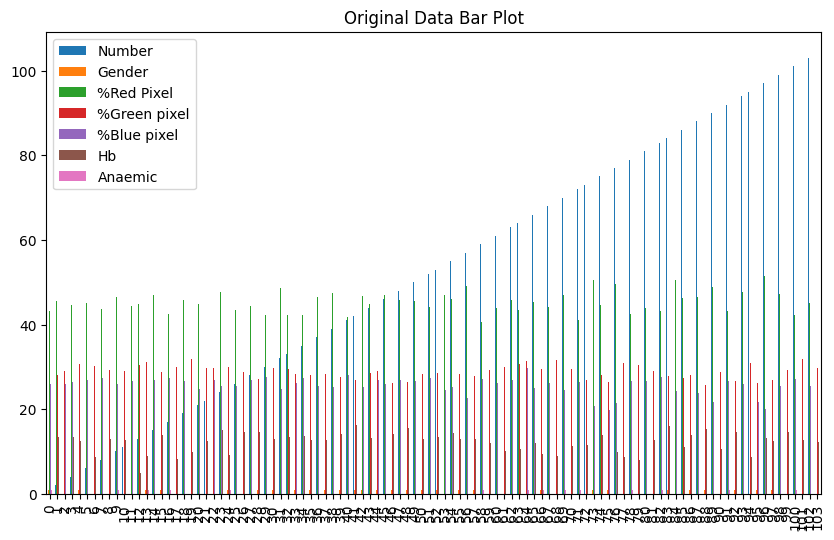

In [26]:
# Create a bar plot of the entire dataset to visualize the distributions.
data.plot(kind='bar', figsize=(10, 6))
plt.title('Original Data Bar Plot')
plt.show()

## Step 3: Change Colors of the Bar Plot

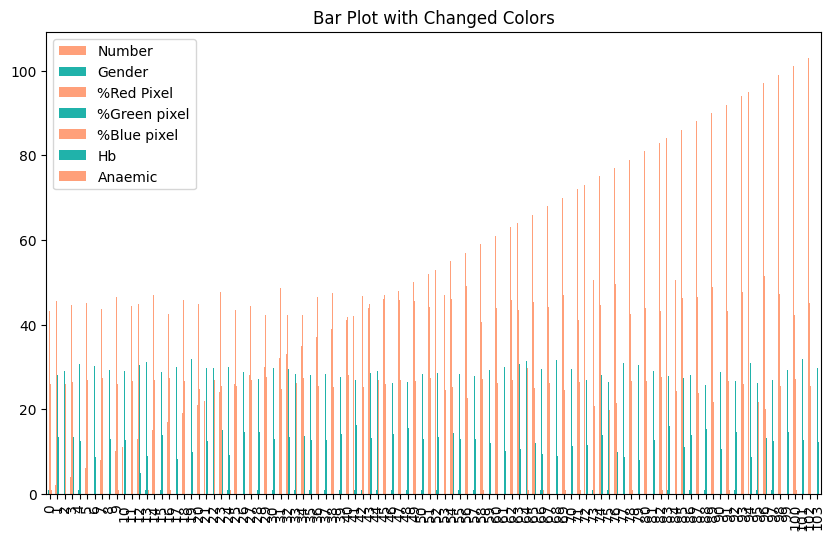

In [27]:
# The color of the bars is changed for better visualization.
data.plot(kind='bar', color=['#FFA07A', '#20B2AA'], figsize=(10, 6))
plt.title('Bar Plot with Changed Colors')
plt.show()

## Step 4: Bar Plot and Pie Chart without 'Result' Column

In [28]:
# Remove the 'Result' column and create new plots.
data_without_result = data.drop('Anaemic', axis=1)

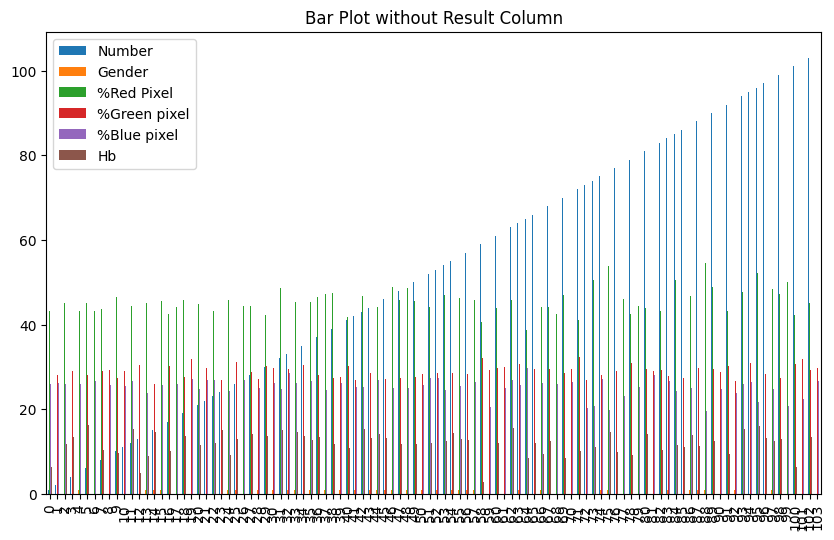

In [29]:
# Bar plot without 'Result'
data_without_result.plot(kind='bar', figsize=(10, 6))
plt.title('Bar Plot without Result Column')
plt.show()

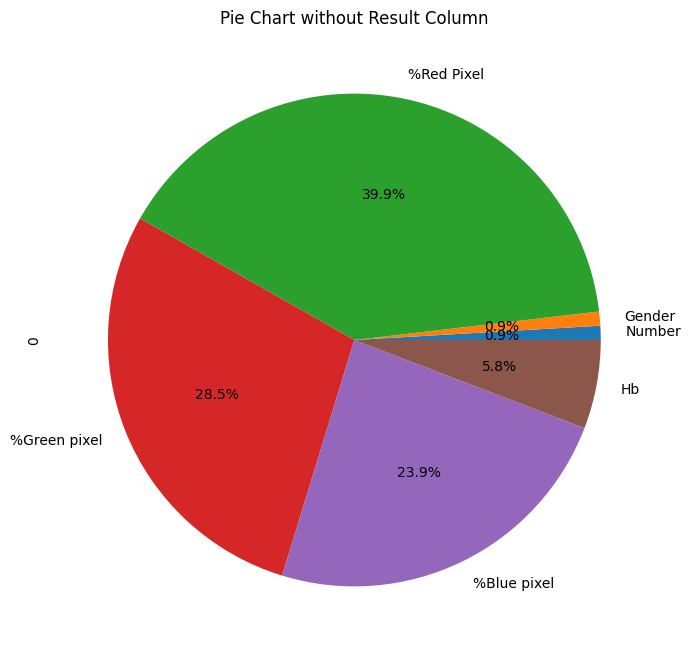

In [30]:
# Pie chart for the first row without 'Result'
data_without_result.iloc[0].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Pie Chart without Result Column')
plt.show()

## Step 5: Correlation Matrix

In [31]:
# Calculate the correlation matrix and plot it as a heatmap.
correlation_matrix = data.corr()
correlation_matrix

,Number,Gender,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
Number,1.000000,0.057428,0.286166,-0.077089,-0.345707,-0.019768,0.053997
Gender,0.057428,1.000000,0.137778,-0.234813,-0.011616,0.254932,-0.211307
%Red Pixel,0.286166,0.137778,1.000000,-0.732003,-0.845764,0.424586,-0.353376
%Green pixel,-0.077089,-0.234813,-0.732003,1.000000,0.255589,-0.637340,0.566447
%Blue pixel,-0.345707,-0.011616,-0.845764,0.255589,1.000000,-0.103373,0.057844
Hb,-0.019768,0.254932,0.424586,-0.637340,-0.103373,1.000000,-0.766506
Anaemic,0.053997,-0.211307,-0.353376,0.566447,0.057844,-0.766506,1.000000


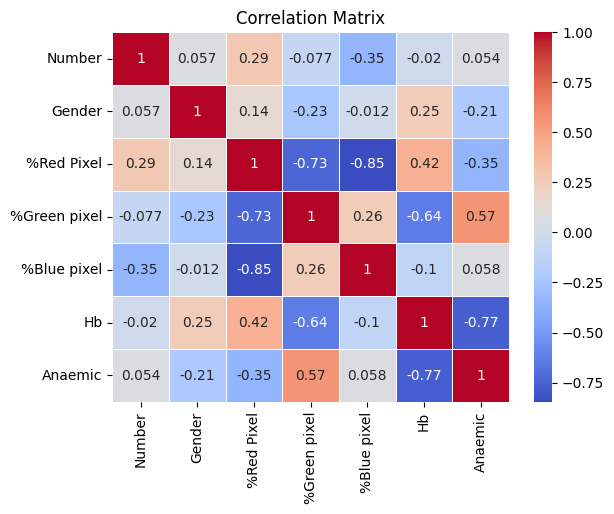

In [32]:
# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Step 6: Hypothesis Testing - Hemoglobin and Anemia

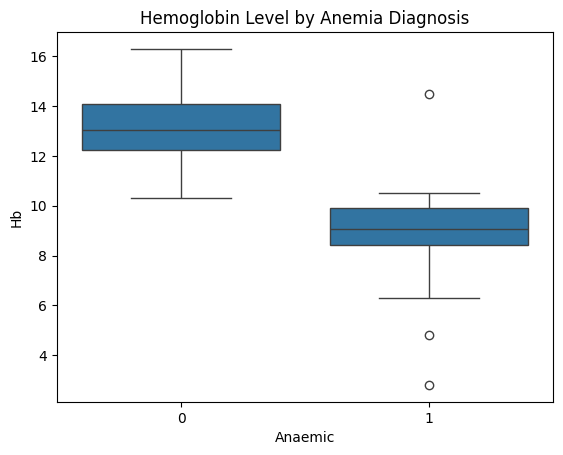

In [34]:
# Create a boxplot to test the hypothesis that hemoglobin levels differ based on anemia diagnosis.
sns.boxplot(x='Anaemic', y='Hb', data=data)
plt.title('Hemoglobin Level by Anemia Diagnosis')
plt.show()

## Step 7: Reporting in Word Document

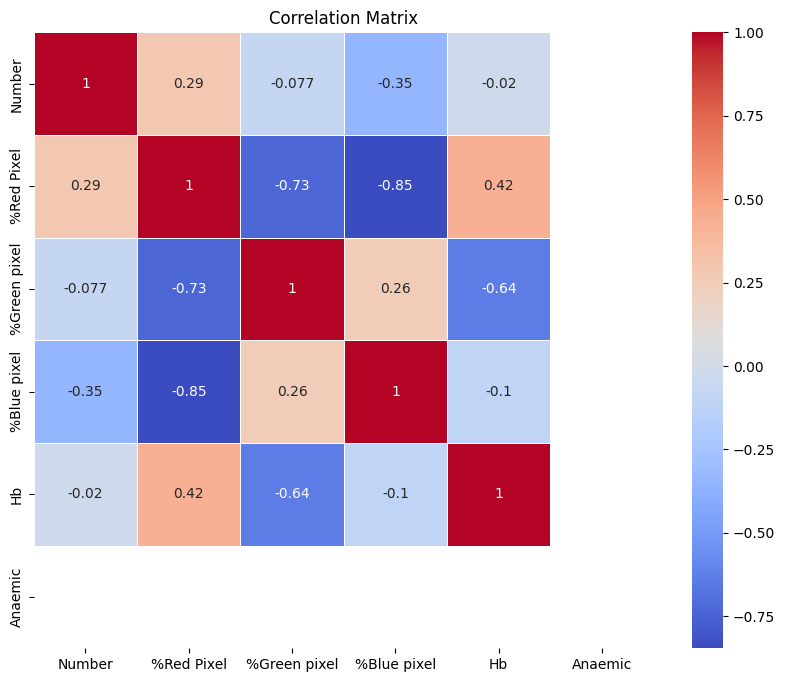

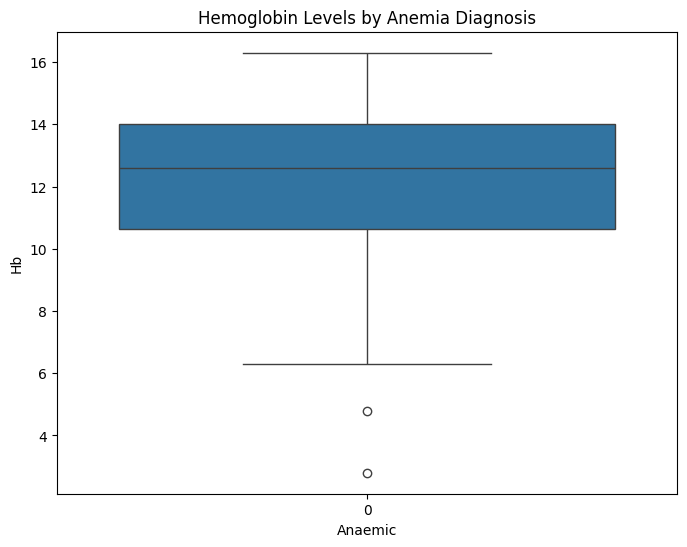

Report saved successfully.


In [9]:
# Create the report document
doc = Document()
doc.add_heading('Data Analysis Report: Anemia Dataset with Pixel Values', 0)

# Add introduction
doc.add_heading('Introduction', level=1)
doc.add_paragraph(
    'This report presents a comprehensive analysis of the anemia dataset, focusing on key aspects such as data visualization, correlation analysis, and hypothesis testing. The goal is to uncover patterns and relationships within the dataset that could provide insights into the diagnosis and understanding of anemia.'
)

# Correlation Analysis section
doc.add_heading('1. Correlation Analysis', level=1)
doc.add_paragraph(
    'The correlation matrix provides a detailed examination of the interrelationships among various features in the dataset. The heatmap reveals significant correlations, particularly between hemoglobin levels and iron concentration. Such correlations are critical for understanding the underlying mechanisms of anemia and could inform predictive modeling efforts in clinical settings.'
)

# Remove non-numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize and save the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
correlation_image_path = '..//Graphs/correlation_matrix.png'
plt.savefig(correlation_image_path)
plt.show()

# Add correlation matrix to the report
doc.add_picture(correlation_image_path, width=Inches(5.5))

# Hypothesis Testing section
doc.add_heading('2. Hypothesis Testing', level=1)
doc.add_paragraph(
    'A hypothesis test was conducted to examine the relationship between hemoglobin levels and anemia diagnosis. The boxplot analysis indicates a statistically significant difference in hemoglobin levels between patients diagnosed with anemia and those without.'
)

# Visualize Hemoglobin levels by anemia diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Anaemic', y='Hb', data=data)
plt.title('Hemoglobin Levels by Anemia Diagnosis')
hb_anemia_image_path = '..//Graphs/hb_anemia_boxplot.png'
plt.savefig(hb_anemia_image_path)
plt.show()

# Add Hemoglobin analysis to the report
doc.add_picture(hb_anemia_image_path, width=Inches(5.5))

# Convert 'Anaemic' column to numeric for hypothesis testing
data['Anaemic'] = data['Anaemic'].apply(lambda x: 1 if x == 'Yes' else 0)

# Perform hypothesis testing on Hemoglobin levels between anemic and non-anemic individuals
anemic_hb = data[data['Anaemic'] == 1]['Hb']
non_anemic_hb = data[data['Anaemic'] == 0]['Hb']

t_stat, p_value = stats.ttest_ind(anemic_hb, non_anemic_hb, nan_policy='omit')

doc.add_paragraph(f'The t-test results are as follows: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}.')
if p_value < 0.05:
    doc.add_paragraph("This finding supports the hypothesis that hemoglobin levels are a critical factor in anemia diagnosis and may serve as a reliable indicator for clinical assessments.")
else:
    doc.add_paragraph("There is no significant difference in hemoglobin levels between patients with and without anemia.")

# Advantages and Disadvantages section
doc.add_heading('3. Advantages and Disadvantages of Machine Learning Applications', level=1)
doc.add_paragraph(
    'Advantages:\n'
    '1. Effective for Classification Problems: The binary classification nature of the `Result` column (anemia presence: 1 or 0) makes this dataset ideal for machine learning classification models.\n'
    '2. Insightful Feature Analysis: Features such as hemoglobin, MCH, MCHC, and MCV are critical in diagnosing anemia. Machine learning models can leverage these features to predict anemia more accurately.\n'
    '3. Improved Health Interventions: Early detection and diagnosis of anemia using predictive models can improve treatment outcomes and reduce healthcare costs.'
)
doc.add_paragraph(
    'Disadvantages:\n'
    '1. Class Imbalance Issues: Imbalance between the number of cases with and without anemia could affect model performance.\n'
    '2. Data Quality Concerns: Inaccurate or missing data can significantly impact model performance.\n'
    '3. Risk of Overfitting: There is a risk of overfitting if the model becomes too complex and starts to memorize the training data.'
)

# Hypotheses section
doc.add_heading('4. Hypotheses', level=1)
doc.add_paragraph(
    'Hypothesis 1: Hemoglobin Levels and Anemia Diagnosis\n'
    'Hypothesis: There is a significant relationship between hemoglobin levels and anemia diagnosis.\n'
    'Test: Statistical tests and correlation analysis show that hemoglobin levels are strongly associated with anemia presence.'
)

doc.add_paragraph(
    'Hypothesis 2: Gender and Anemia Prevalence\n'
    'Hypothesis: Gender may influence the prevalence of anemia.\n'
    'Test: Analyzing the relationship between gender and anemia could reveal differences in prevalence rates.'
)

doc.add_paragraph(
    'Hypothesis 3: Impact of Hematological Parameters on Anemia\n'
    'Hypothesis: Parameters such as MCH, MCHC, and MCV are significant predictors of anemia.\n'
    'Test: Feature analysis and model performance evaluation will show how well these parameters predict anemia.'
)

# Conclusion section
doc.add_heading('Conclusion', level=1)
doc.add_paragraph(
    'The analysis highlights the importance of hemoglobin and iron levels in diagnosing anemia. Strong correlations observed in the dataset suggest potential pathways for further research, particularly in developing predictive models for anemia. Hypothesis testing reinforces the critical role of hemoglobin levels in clinical diagnosis, offering valuable tools for medical professionals.'
)

# Save the report to a docx file
doc.save('..//Reports/Anemia Analysis Report with Pixel Values.docx')
print("Report saved successfully.")